# **DOWNLOAD DATASET**

In [ ]:
import kagglehub
import shutil
import os

#Mengunduh langsung dari kaggle
path = kagglehub.dataset_download("adityakadiwal/water-potability")
fileori = os.path.join(path, "water_potability.csv")

renamefile = "dataset.csv"

if os.path.exists(fileori):
    shutil.copy(fileori, renamefile)
    print(f"Dataset berhasil disimpan sebagai {renamefile}")
else:
    print("File tidak ditemukan di kaggle")


100%|██████████| 251k/251k [00:00<00:00, 8.89MB/s]

Extracting files...
Dataset berhasil disimpan sebagai dataset.csv


# **PRE-PROCESSING DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load Dataset
df = pd.read_csv('dataset.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# Cek duplikat
df.duplicated().sum()

0

In [ ]:
# Deskripsi Fitur
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Cek Missing Value
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


## **Handle Miss Value**

### **Miss Value Mean**

In [ ]:
dfmean=pd.read_csv('dataset.csv')
dfmean.fillna(dfmean.mean(), inplace=True)
dfmean.to_csv('dataset mean.csv', index=False)
dfmean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


## **Handle Outlier**

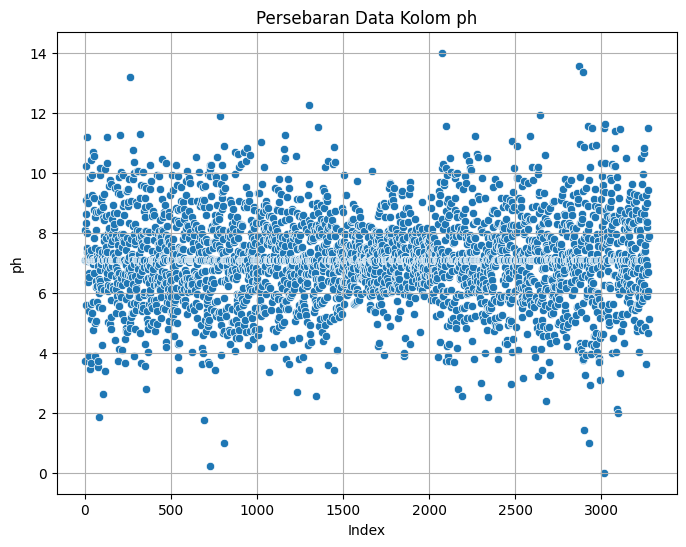

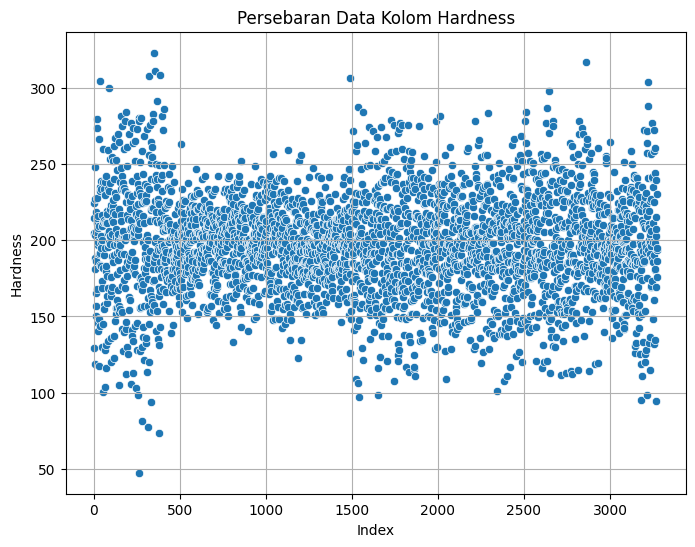

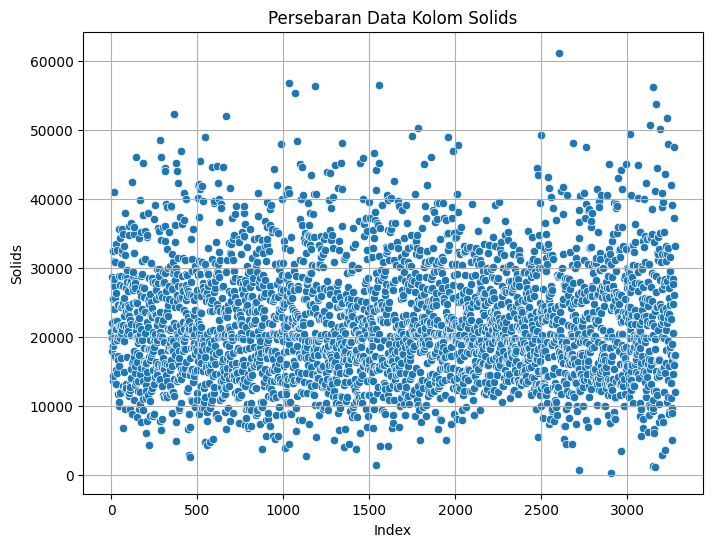

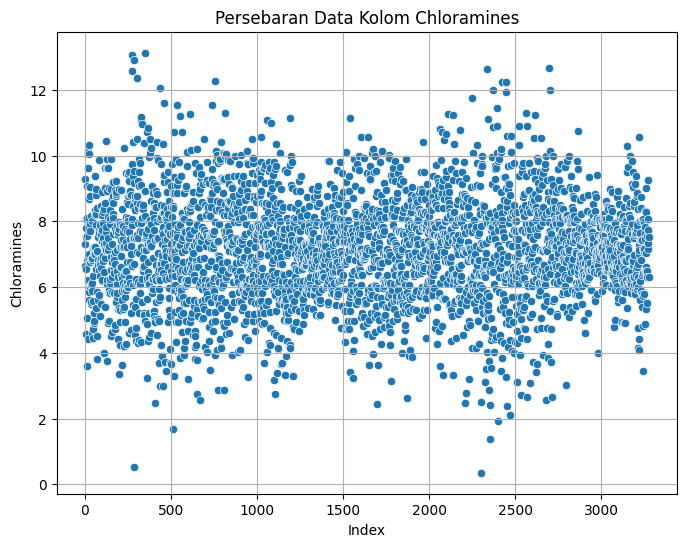

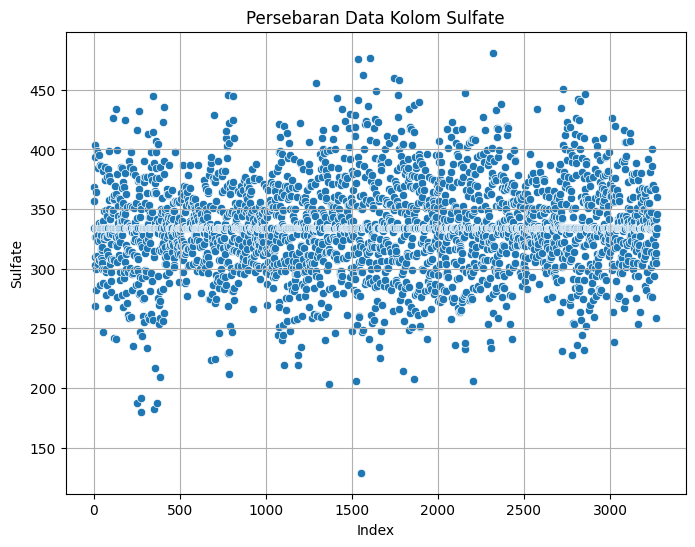

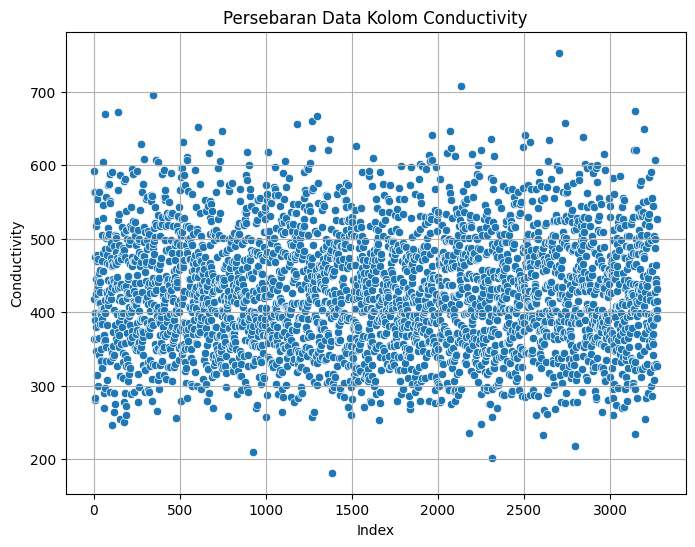

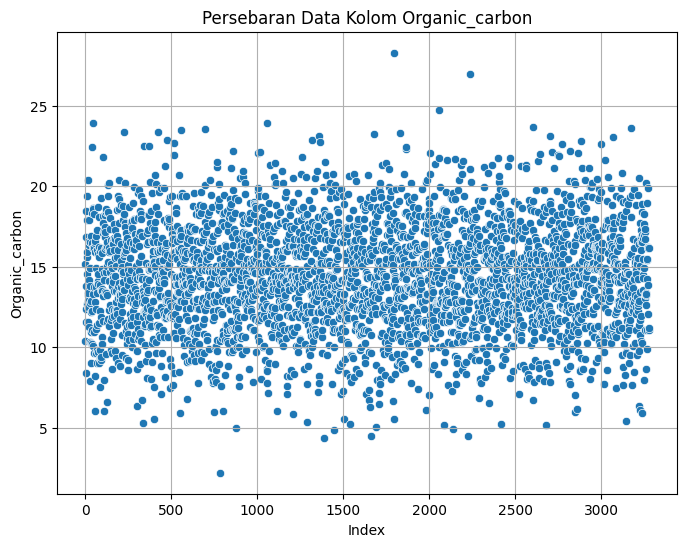

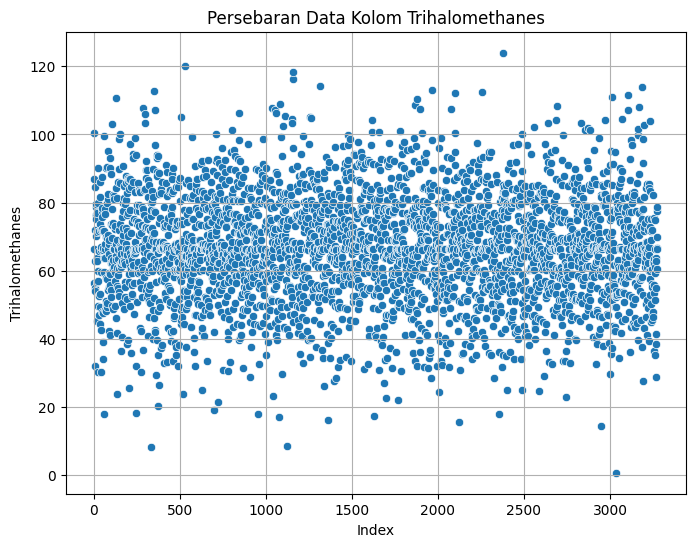

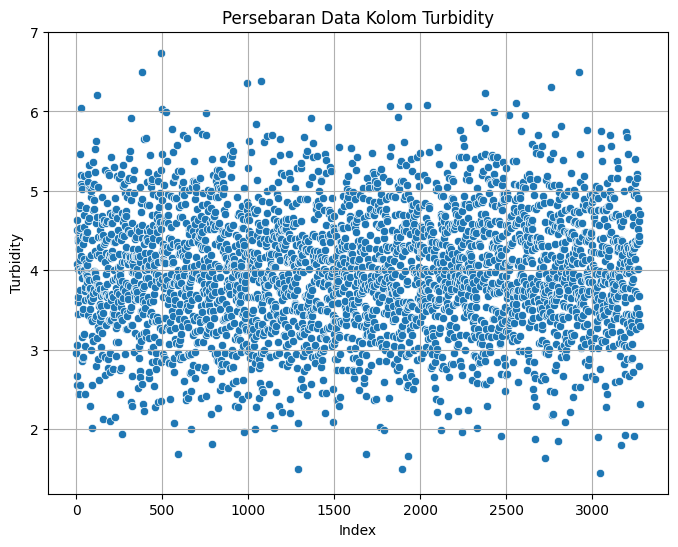

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('dataset mean.csv')

# Kolom yang akan divisualisasikan
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
           'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Membuat scatter plot untuk setiap kolom
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=range(1, len(df) + 1), y=df[col])
    plt.title(f'Persebaran Data Kolom {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


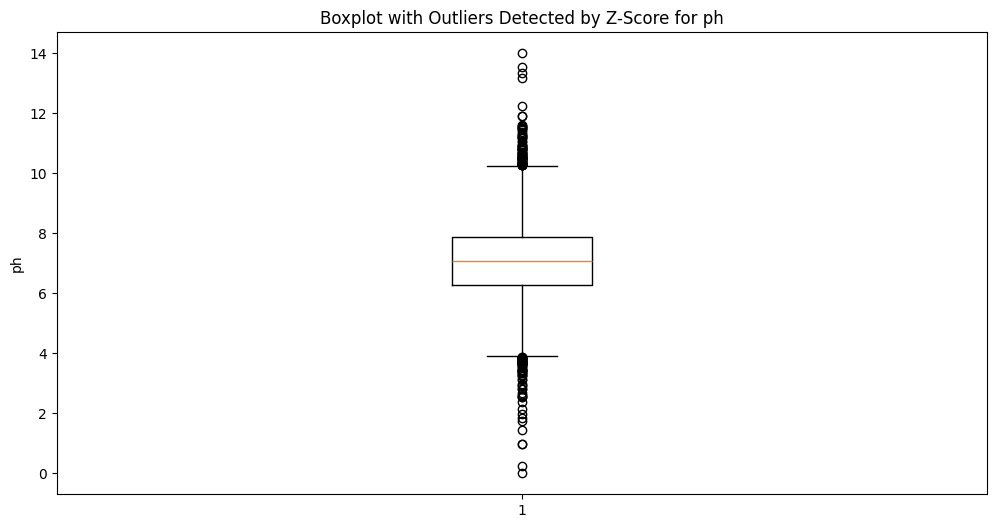

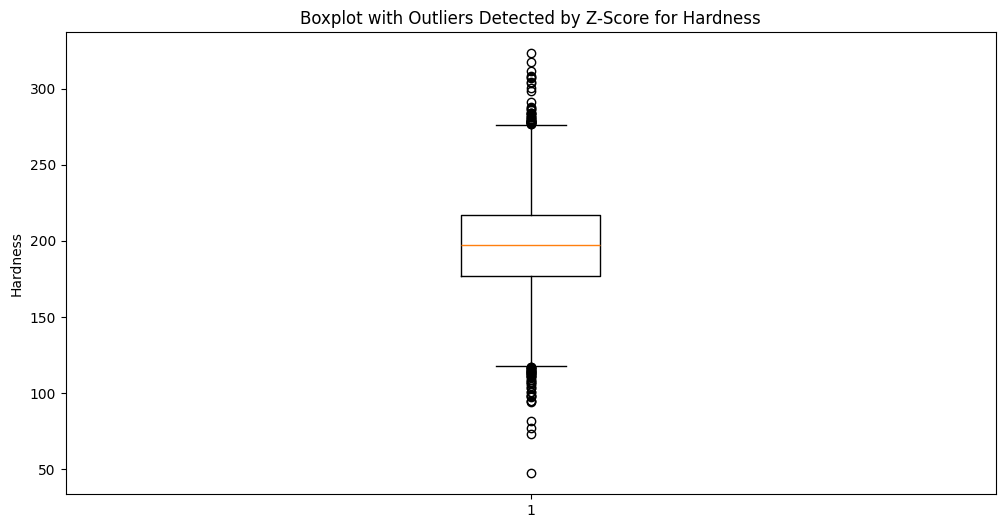

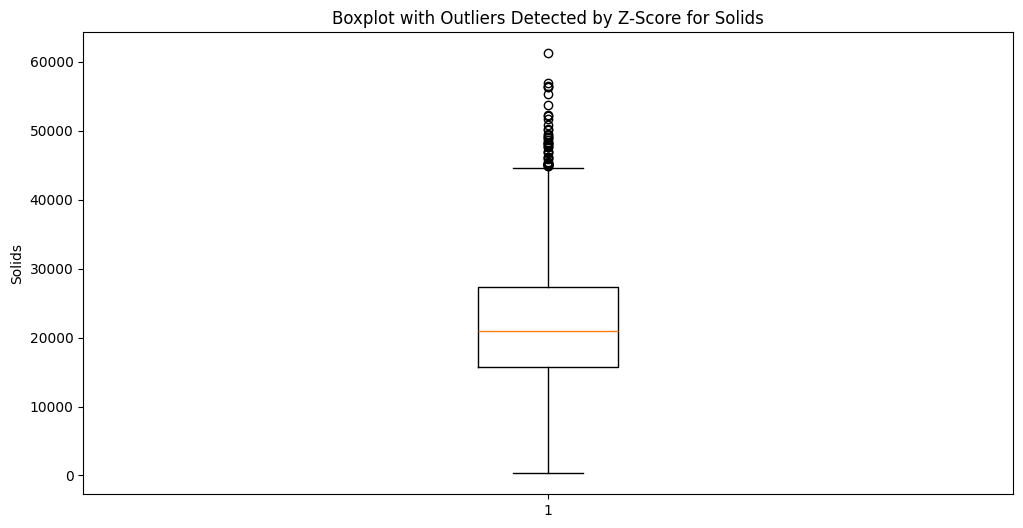

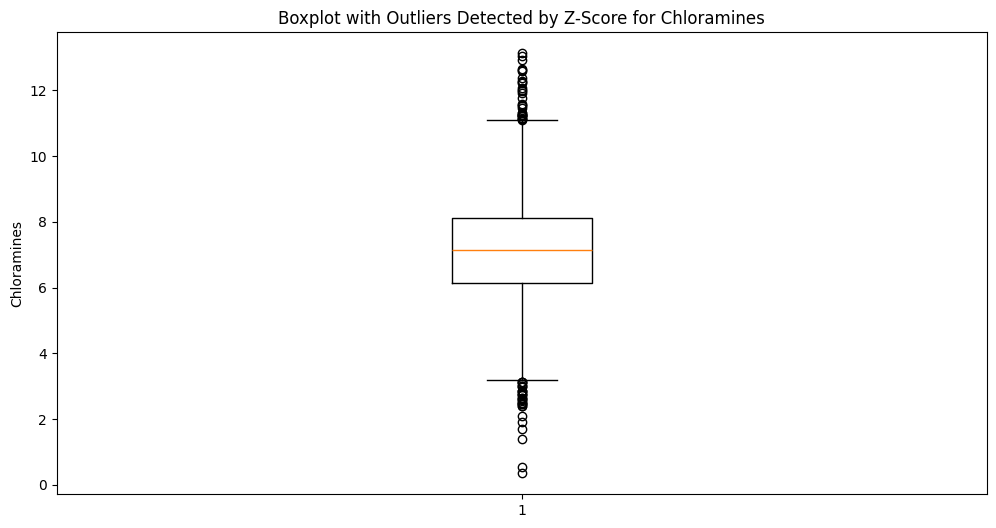

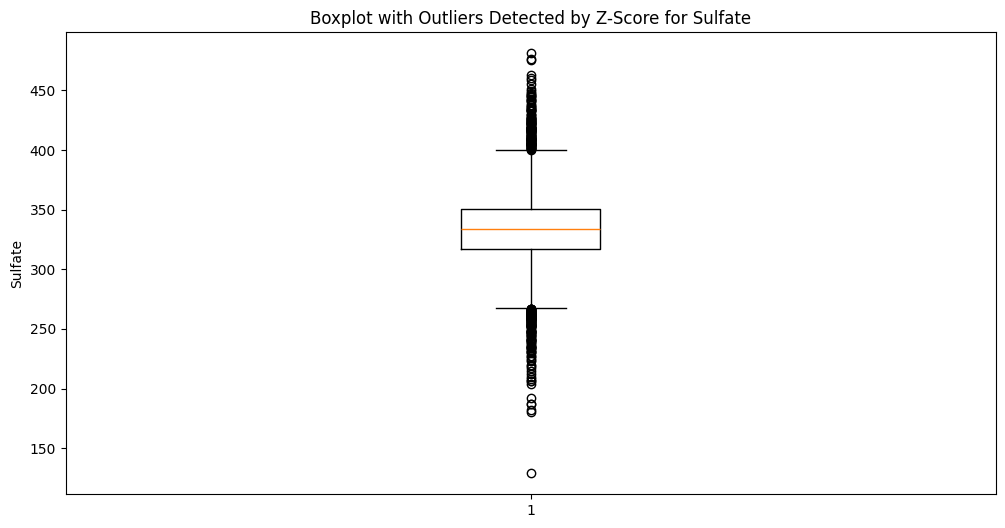

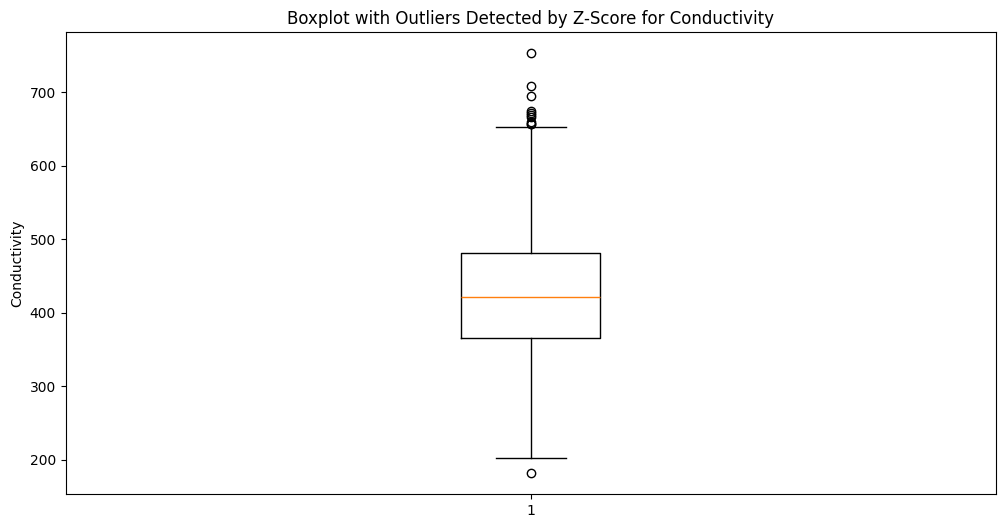

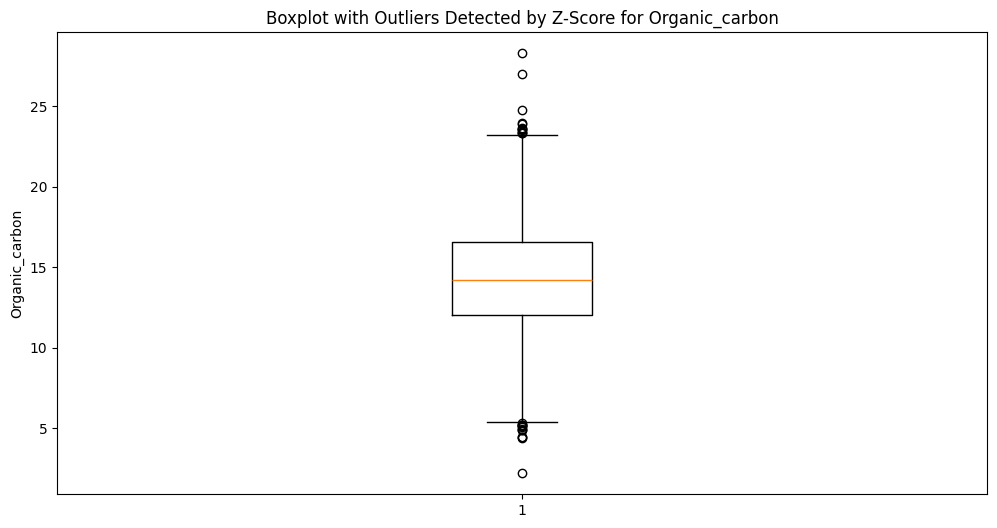

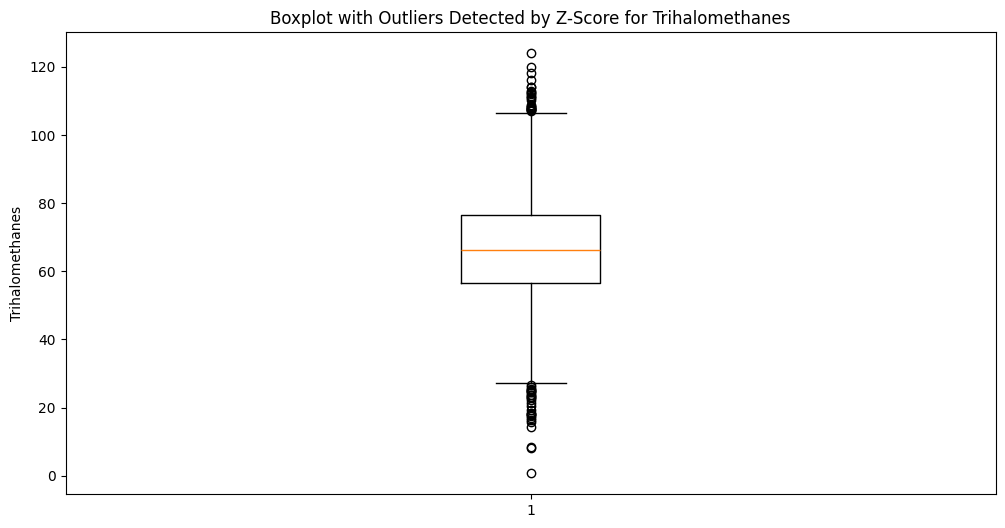

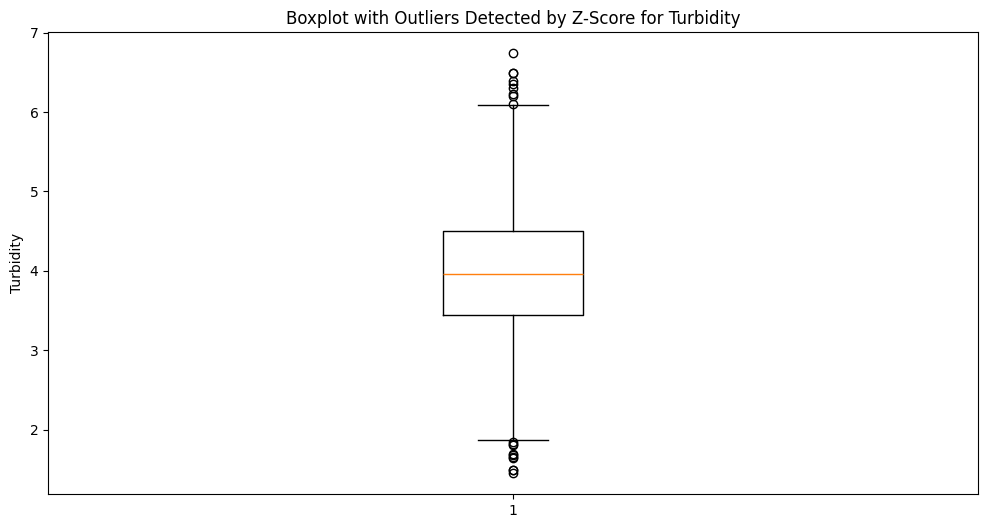

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung Z-score dan menandai outlier
def calculate_zscore_outliers(df, column):
    df['z_score'] = (df[column] - df[column].mean()) / df[column].std()
    df['outlier'] = np.abs(df['z_score']) > 3
    return df

# List of numerical columns to analyze
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Process data and create boxplots for each column
for column_name in numerical_columns:
    dfmeann = calculate_zscore_outliers(dfmean.copy(), column_name)

    plt.figure(figsize=(12, 6))
    plt.boxplot([dfmeann[column_name]])
    plt.title(f'Boxplot with Outliers Detected by Z-Score for {column_name}')
    plt.ylabel(column_name)
    plt.show()

### **Delete Outlier Z Score**

In [ ]:
dtmean=pd.read_csv('dataset mean.csv')
from scipy.stats import zscore
z_scores = dtmean[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']].apply(zscore)
dtmean = dtmean[(z_scores < 3).all(axis=1)]
dtmean.to_csv('dataset mean delout.csv', index=False)
dtmean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
dfmeandelout=pd.read_csv('dataset mean delout.csv')
dfmeandelout

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3177,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3178,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3179,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3180,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# **EKSPLORATORY DATA ANALYSIS**

### **Distribusi Fitur**

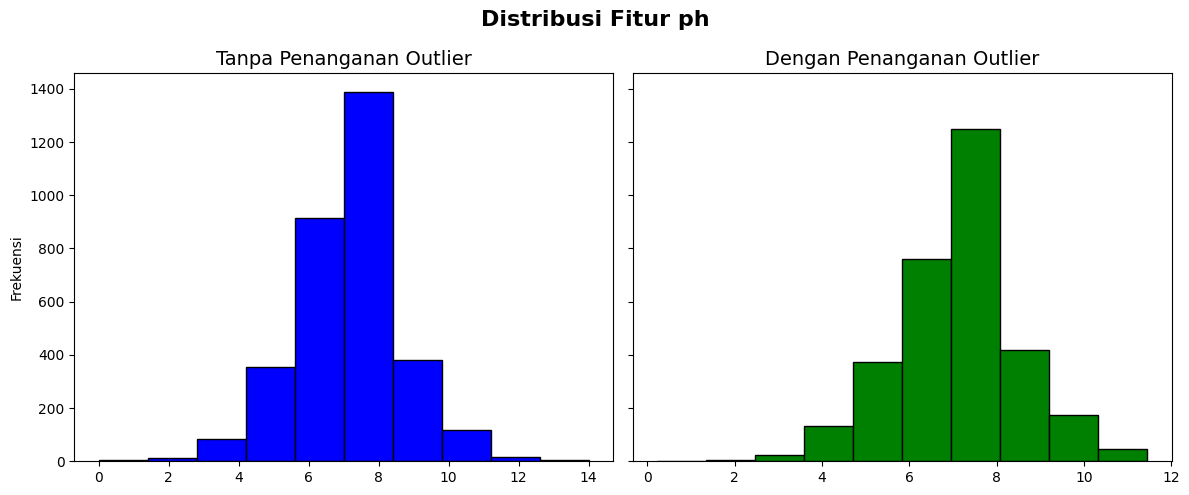

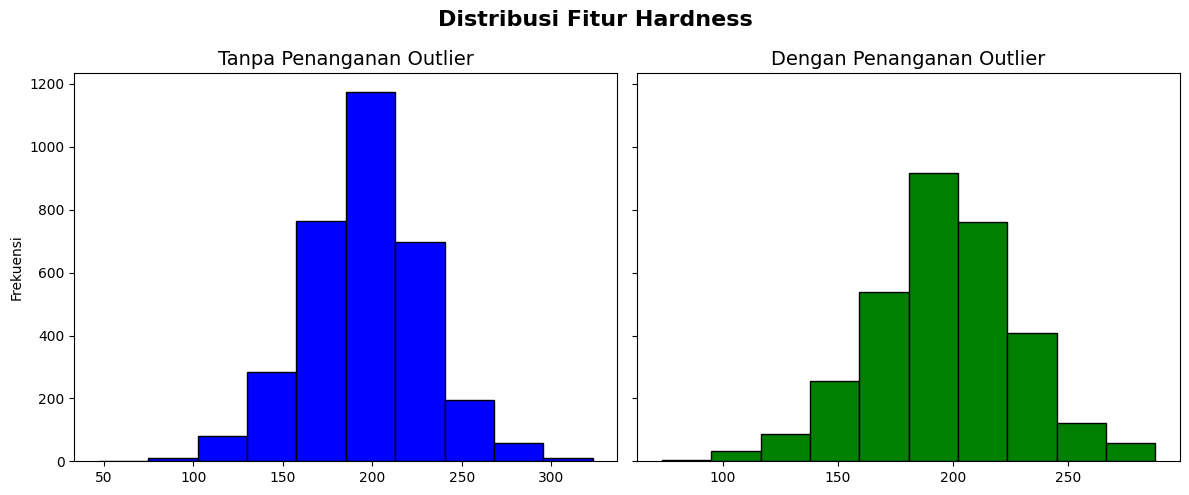

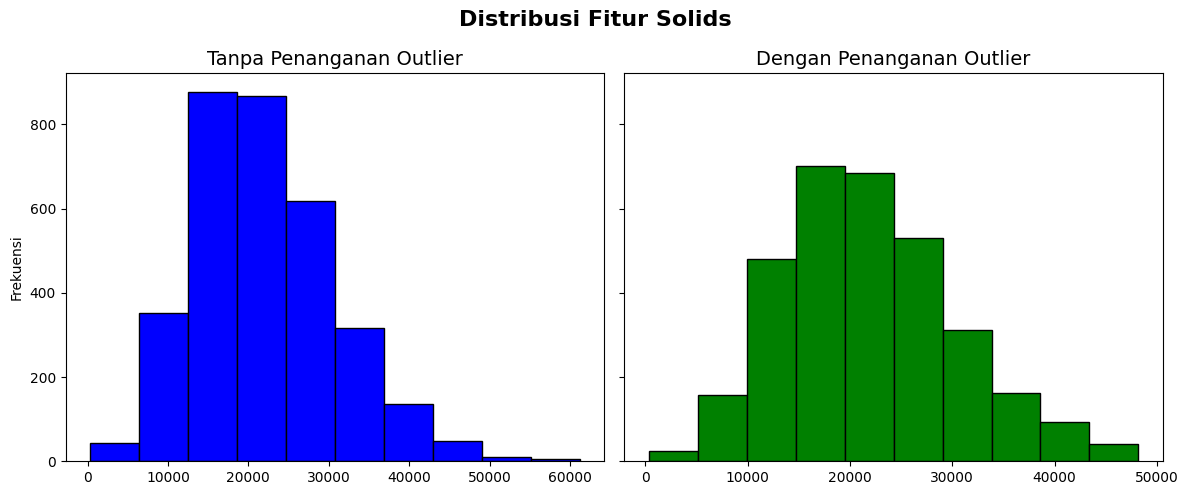

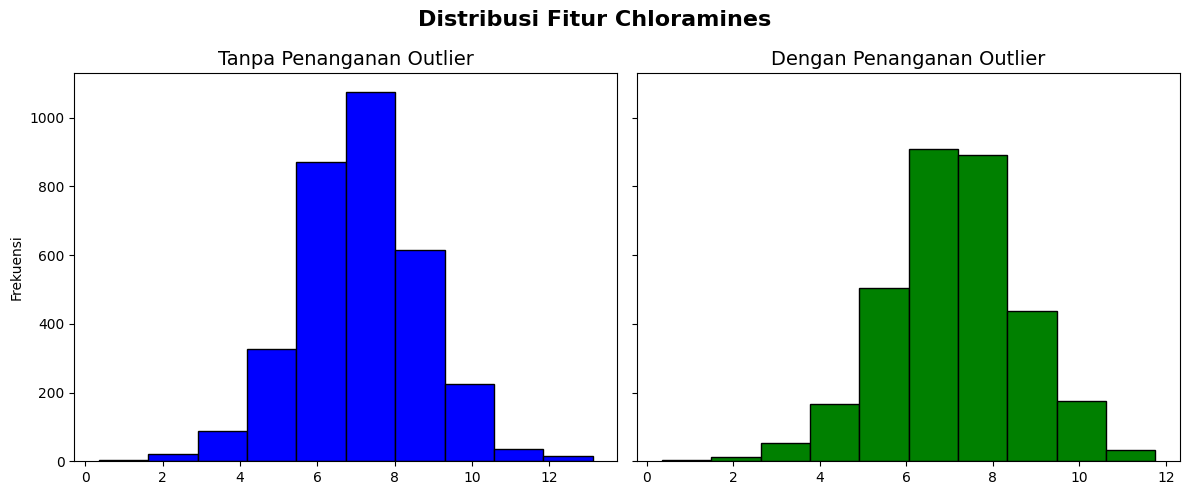

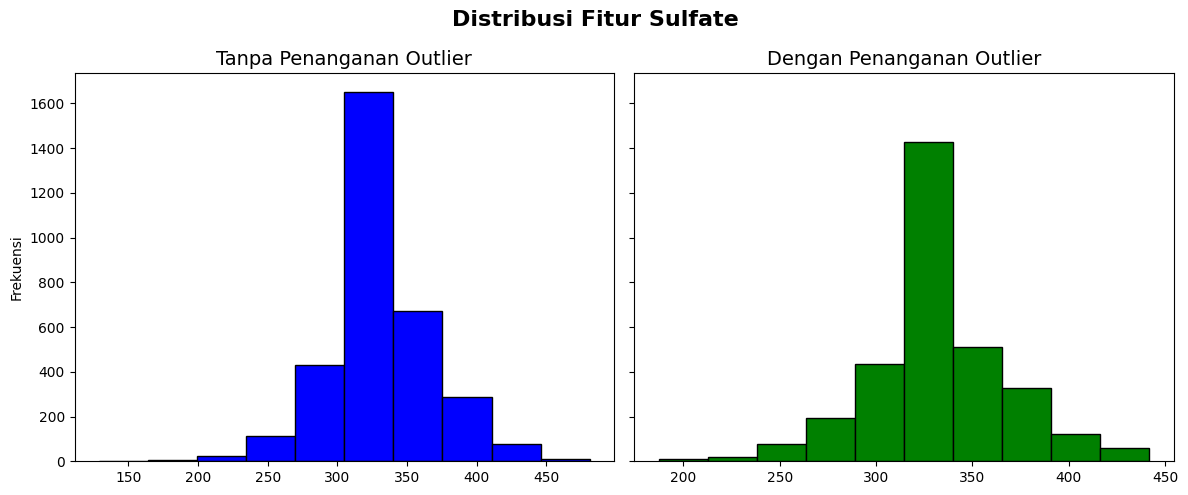

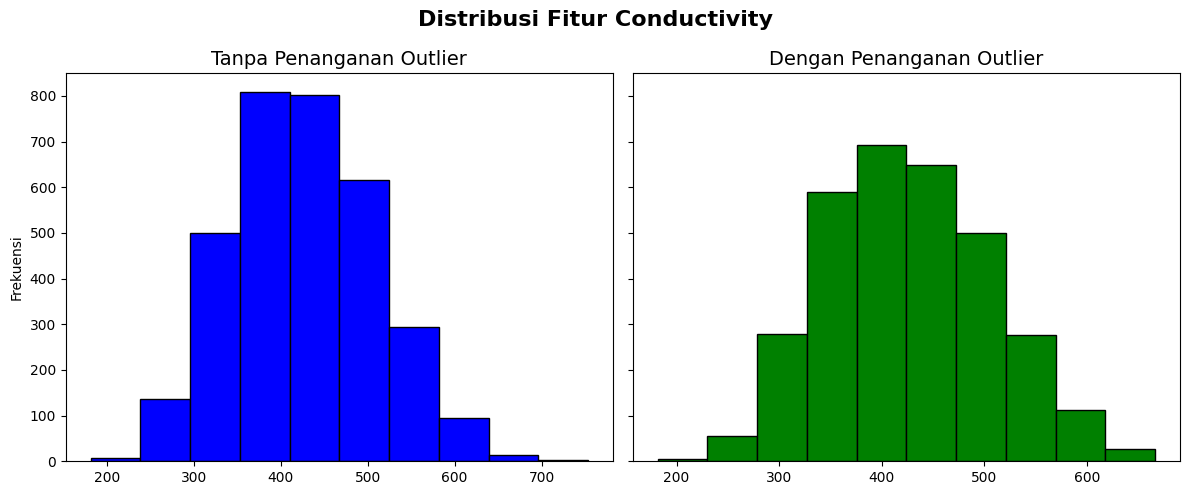

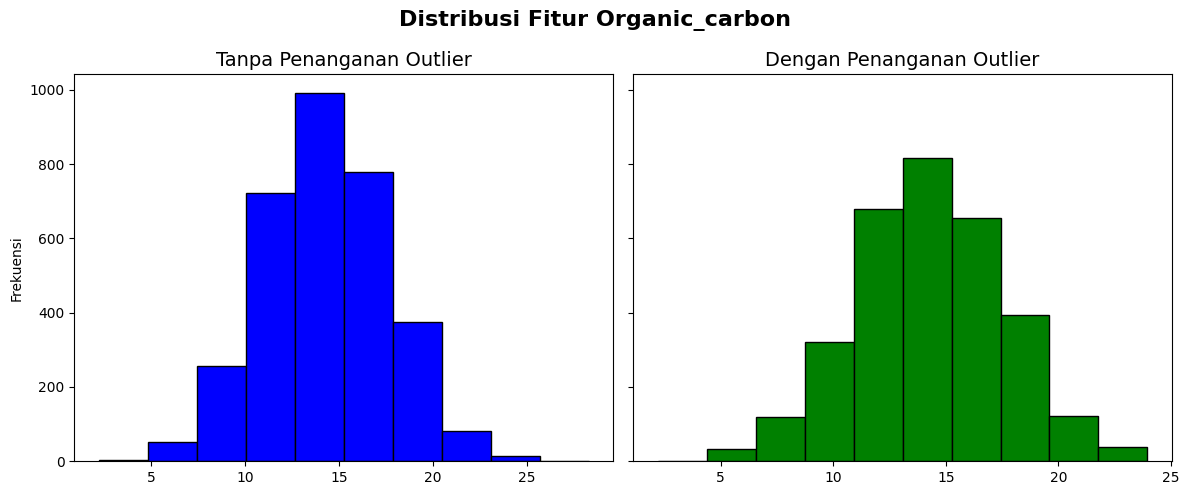

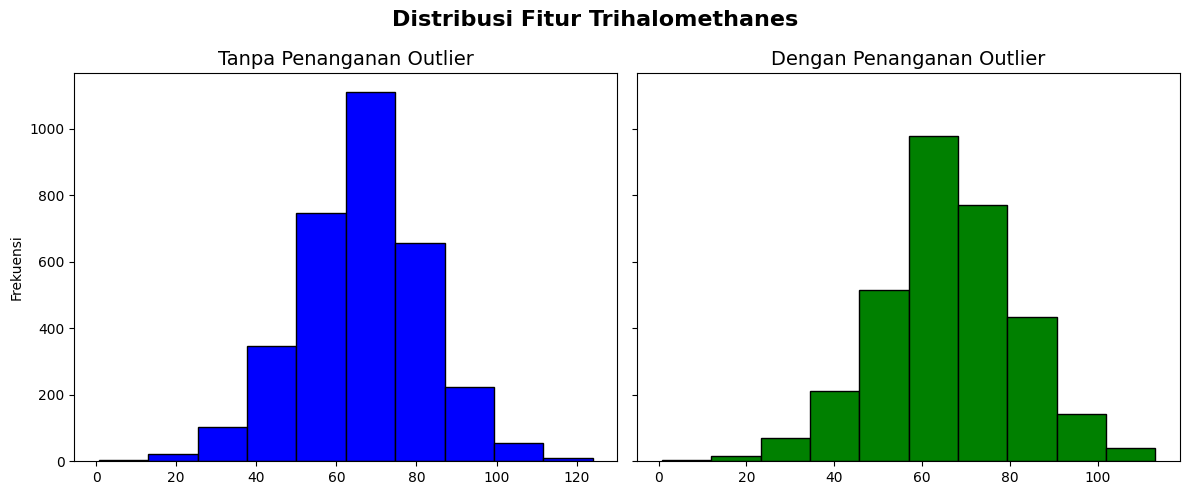

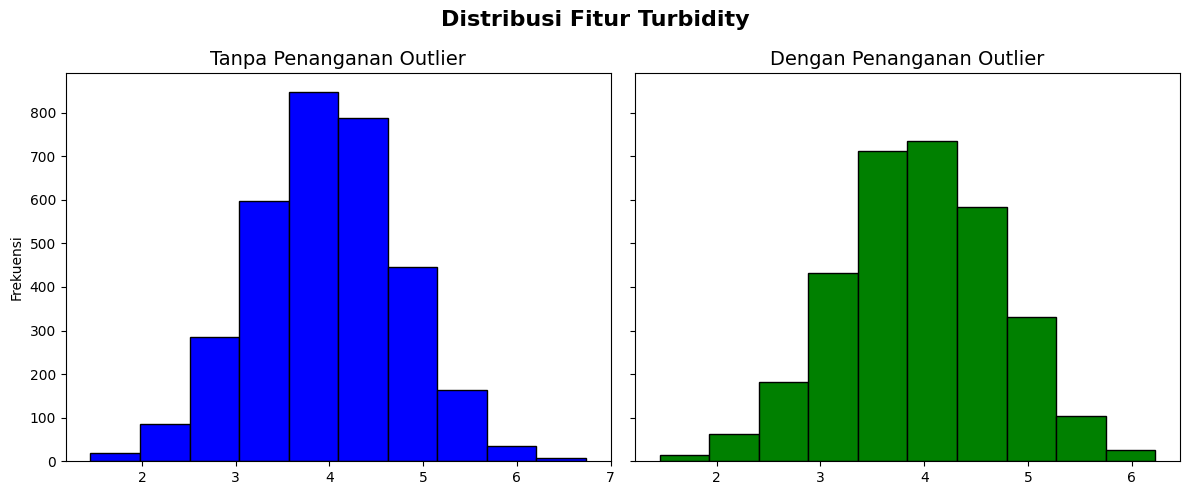

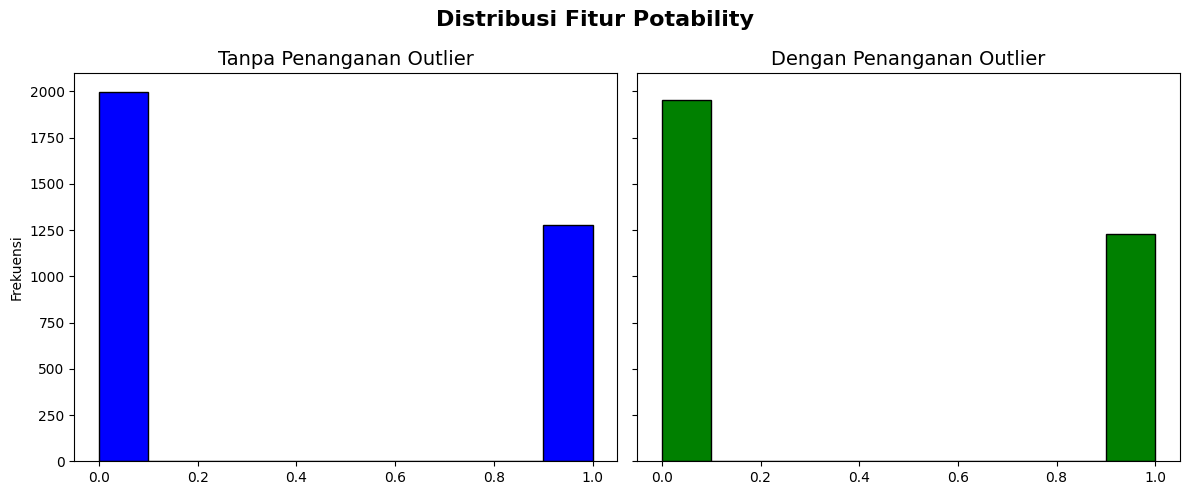

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dfmean and dfmeandelout are your DataFrames

for column in dfmean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns
    fig.suptitle(f'Distribusi Fitur {column}', fontsize=16, weight='bold')

    # Histogram for dfmean (left)
    dfmean[column].hist(grid=False, color='blue', edgecolor='black', ax=axes[0])
    axes[0].set_title('Tanpa Penanganan Outlier', fontsize=14)
    axes[0].set_ylabel('Frekuensi')

    # Histogram for dfmeandelout (right)
    dfmeandelout[column].hist(grid=False, color='green', edgecolor='black', ax=axes[1])
    axes[1].set_title('Dengan Penanganan Outlier', fontsize=14)

    plt.tight_layout()
    plt.show()

### **Korelasi Antar Fitur**

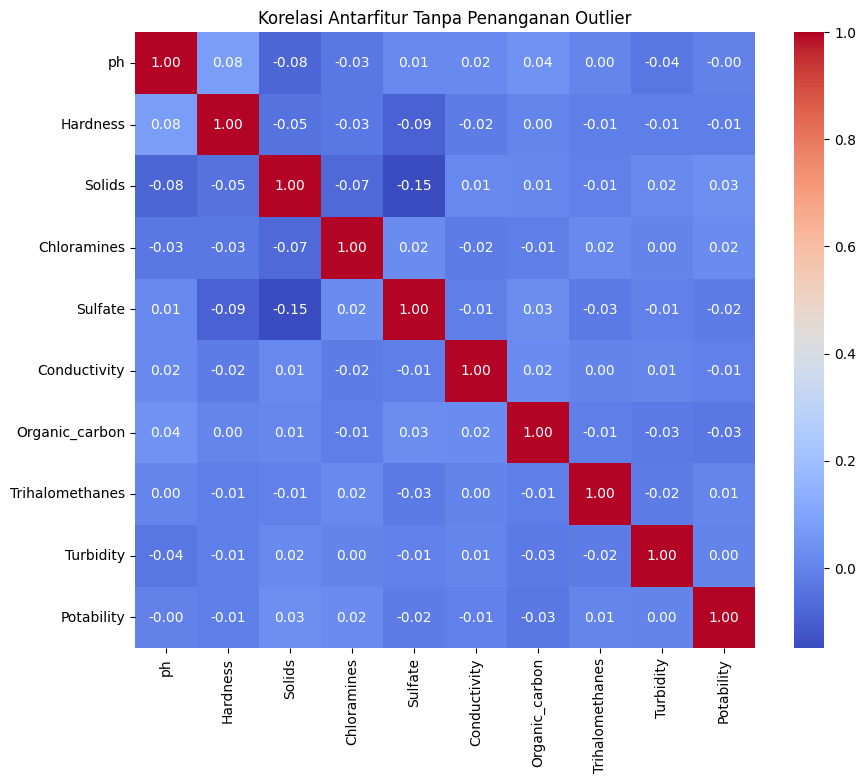

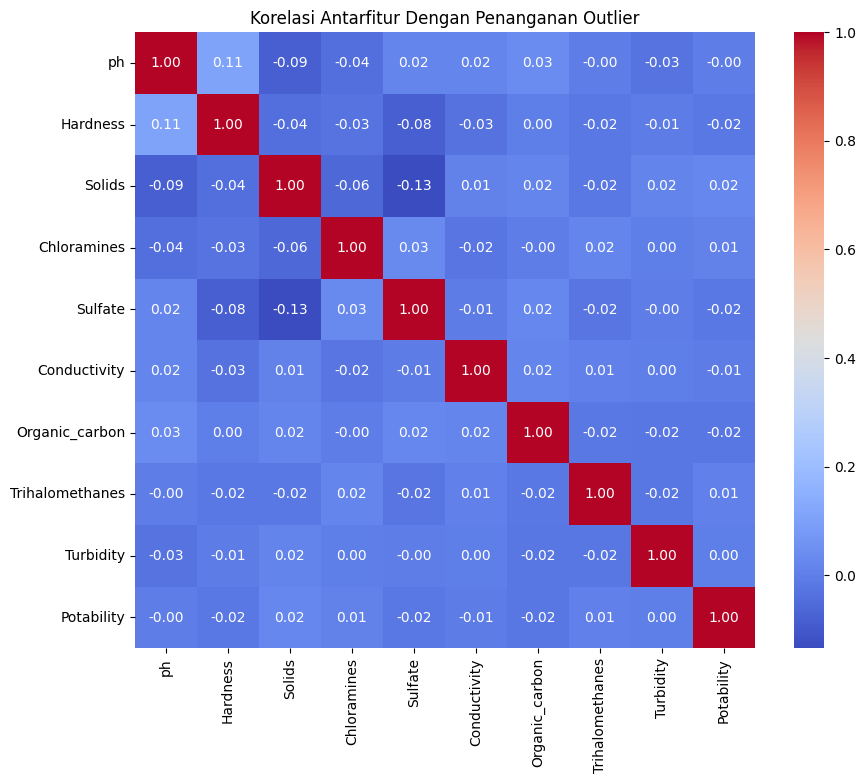

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur
correlation_matrix = dfmean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antarfitur Tanpa Penanganan Outlier")
plt.show()

correlation_matrix = dfmeandelout.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antarfitur Dengan Penanganan Outlier")
plt.show()

# **MODELLING**

## **NAIVE BAYES**

### **NB MEAN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_mean=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy: 0.6310975609756098
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656

Naive Bayes Confusion Matrix:
[[361  51]
 [191  53]]


### **NB MEAN + DELOUT**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_mean_delout=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy: 0.6687598116169545
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       422
           1       0.52      0.22      0.31       215

    accuracy                           0.67       637
   macro avg       0.61      0.56      0.55       637
weighted avg       0.64      0.67      0.62       637

Naive Bayes Confusion Matrix:
[[378  44]
 [167  48]]


### **NB MEAN + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred = nb_model.predict(X_test)

print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_mean_smote=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy: 0.5685975609756098
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       412
           1       0.43      0.47      0.45       244

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.58      0.57      0.57       656

Naive Bayes Confusion Matrix:
[[258 154]
 [129 115]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### **NB MEAN + DELOUT + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred = nb_model.predict(X_test)

print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_mean_smote_delout=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy: 0.5494505494505495
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       422
           1       0.39      0.59      0.47       215

    accuracy                           0.55       637
   macro avg       0.55      0.56      0.54       637
weighted avg       0.61      0.55      0.56       637

Naive Bayes Confusion Matrix:
[[224 198]
 [ 89 126]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### **NB MEAN + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, 10)}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Naive Bayes Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_tuned=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy after Tuning: 0.6341463414634146
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       412
           1       0.52      0.22      0.31       244

    accuracy                           0.63       656
   macro avg       0.59      0.55      0.53       656
weighted avg       0.60      0.63      0.59       656

Naive Bayes Confusion Matrix:
[[363  49]
 [191  53]]


### **NB MEAN + DELOUT + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, 10)}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Naive Bayes Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_tuned_delout=accuracy_score(y_test, y_pred)

Naive Bayes Accuracy after Tuning: 0.6687598116169545
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       422
           1       0.53      0.17      0.26       215

    accuracy                           0.67       637
   macro avg       0.61      0.55      0.52       637
weighted avg       0.63      0.67      0.61       637

Naive Bayes Confusion Matrix:
[[389  33]
 [178  37]]


### **NB MEAN + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, 10)}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Naive Bayes Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_tuned_smote=accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Naive Bayes Accuracy after Tuning: 0.5838414634146342
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       412
           1       0.44      0.45      0.45       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Naive Bayes Confusion Matrix:
[[273 139]
 [134 110]]


### **NB MEAN + DELOUT + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, 10)}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Naive Bayes Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
nb_tuned_delout_smote=accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Naive Bayes Accuracy after Tuning: 0.5604395604395604
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       422
           1       0.39      0.52      0.44       215

    accuracy                           0.56       637
   macro avg       0.54      0.55      0.54       637
weighted avg       0.60      0.56      0.57       637

Naive Bayes Confusion Matrix:
[[246 176]
 [104 111]]


### **VISUALISASI HASIL AKURASI NAIVE BAYES**

<ipython-input-23-84a0771d90ca>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(methods), y=list(scores), palette="viridis")


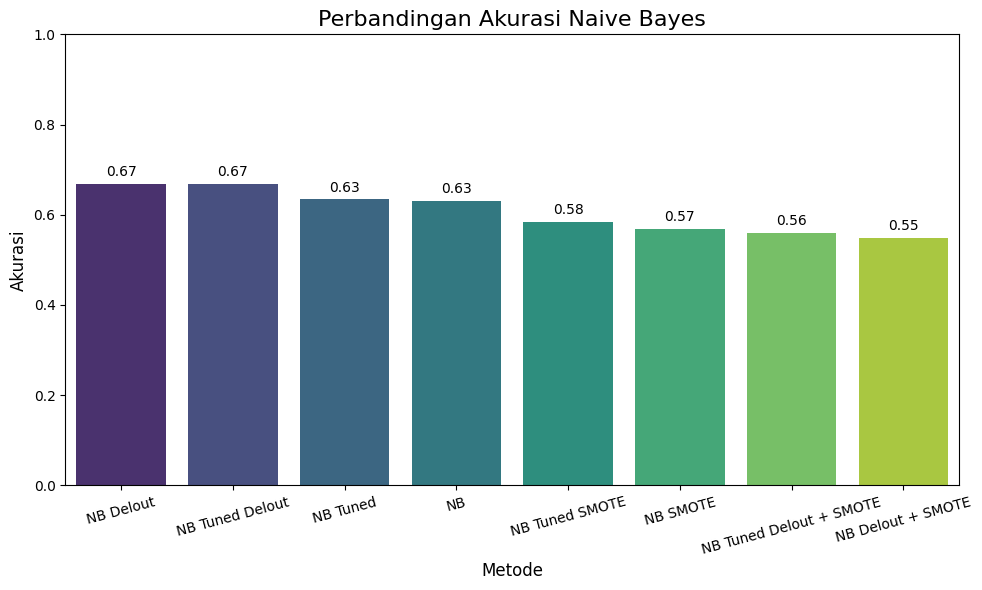

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracies = {
    "NB": nb_mean,
    "NB SMOTE": nb_mean_smote,
    "NB Delout": nb_mean_delout,
    "NB Delout + SMOTE": nb_mean_smote_delout,
    "NB Tuned": nb_tuned,
    "NB Tuned Delout": nb_tuned_delout,
    "NB Tuned SMOTE": nb_tuned_smote,
    "NB Tuned Delout + SMOTE": nb_tuned_delout_smote
}

# Mengurutkan metode berdasarkan akurasi (terbesar ke terkecil)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Membuat data untuk visualisasi dari hasil pengurutan
methods, scores = zip(*sorted_accuracies)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(methods), y=list(scores), palette="viridis")

# Menambahkan anotasi akurasi pada masing-masing batang
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title("Perbandingan Akurasi Naive Bayes", fontsize=16)
plt.xlabel("Metode", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)
plt.ylim(0, 1)  # Batas y untuk akurasi (0-1)

# Menampilkan plot
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## **DECISION TREE**

### **DT MEAN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_mean=accuracy_score(y_test, y_pred)

Decision Tree Accuracy: 0.5777439024390244
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Decision Tree Confusion Matrix:
[[255 157]
 [120 124]]


### **DT MEAN + DELOUT**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_delout = accuracy_score(y_test, y_pred)


Decision Tree Accuracy: 0.6169544740973313
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       422
           1       0.44      0.49      0.46       215

    accuracy                           0.62       637
   macro avg       0.58      0.59      0.58       637
weighted avg       0.63      0.62      0.62       637

Decision Tree Confusion Matrix:
[[288 134]
 [110 105]]


### **DT MEAN + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_smote = accuracy_score(y_test, y_pred)


Decision Tree Accuracy: 0.5823170731707317
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       412
           1       0.44      0.50      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.59       656

Decision Tree Confusion Matrix:
[[261 151]
 [123 121]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### **DT MEAN + DELOUT + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_delout_smote = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Decision Tree Accuracy: 0.565149136577708
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       422
           1       0.39      0.49      0.43       215

    accuracy                           0.57       637
   macro avg       0.54      0.55      0.54       637
weighted avg       0.59      0.57      0.57       637

Decision Tree Confusion Matrix:
[[255 167]
 [110 105]]


### **DT MEAN + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'criterion': ['gini', 'entropy'],             # Criterion to measure the quality of a split
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Decision Tree Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Accuracy after Tuning: 0.6097560975609756
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       412
           1       0.47      0.34      0.40       244

    accuracy                           0.61       656
   macro avg       0.57      0.56      0.55       656
weighted avg       0.59      0.61      0.59       656

Decision Tree Confusion Matrix:
[[316  96]
 [160  84]]


### **DT MEAN + DELOUT + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'criterion': ['gini', 'entropy'],             # Criterion to measure the quality of a split
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Decision Tree Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_delout_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Accuracy after Tuning: 0.6797488226059655
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       422
           1       0.55      0.28      0.37       215

    accuracy                           0.68       637
   macro avg       0.63      0.58      0.58       637
weighted avg       0.65      0.68      0.65       637

Decision Tree Confusion Matrix:
[[372  50]
 [154  61]]


### **DT MEAN + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'criterion': ['gini', 'entropy'],             # Criterion to measure the quality of a split
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Decision Tree Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_smote_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Decision Tree Accuracy after Tuning: 0.586890243902439
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       412
           1       0.45      0.50      0.48       244

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.59      0.59       656

Decision Tree Confusion Matrix:
[[262 150]
 [121 123]]


### **DT MEAN + DELOUT + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'criterion': ['gini', 'entropy'],             # Criterion to measure the quality of a split
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Decision Tree Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
dt_delout_smote_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Decision Tree Accuracy after Tuning: 0.6150895140664961
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       384
           1       0.64      0.57      0.60       398

    accuracy                           0.62       782
   macro avg       0.62      0.62      0.61       782
weighted avg       0.62      0.62      0.61       782

Decision Tree Confusion Matrix:
[[255 129]
 [172 226]]


### **VISUALISASI HASIL AKURASI DECISION TREE**

<ipython-input-32-3236e9628a4c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(methods), y=list(scores), palette="viridis")


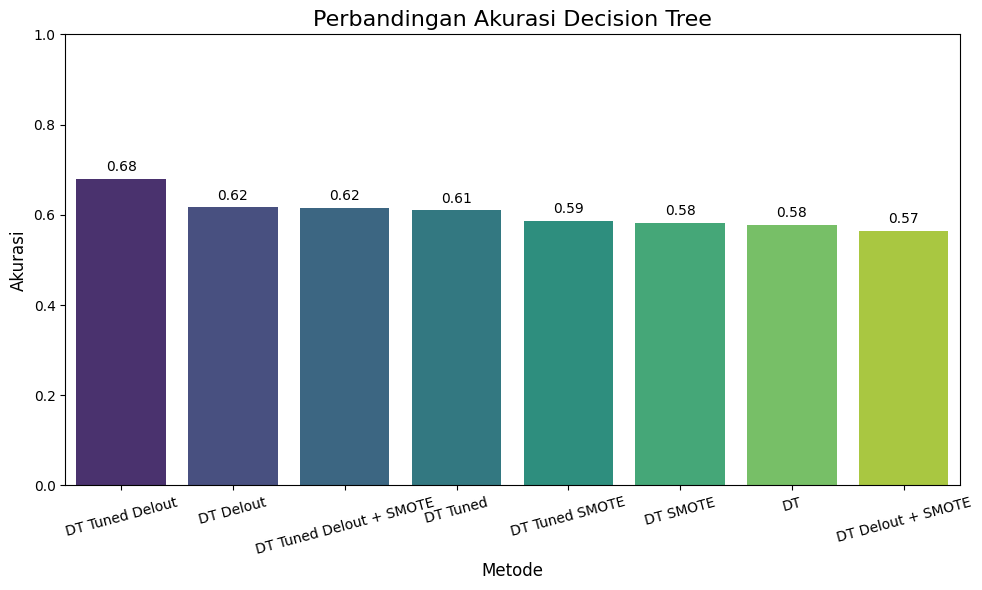

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nilai akurasi masing-masing metode
accuracies = {
    "DT": dt_mean,
    "DT SMOTE": dt_smote,
    "DT Delout": dt_delout,
    "DT Delout + SMOTE": dt_delout_smote,
    "DT Tuned": dt_tuned,
    "DT Tuned Delout": dt_delout_tuned,
    "DT Tuned SMOTE": dt_smote_tuned,
    "DT Tuned Delout + SMOTE": dt_delout_smote_tuned
}

# Mengurutkan metode berdasarkan akurasi (terbesar ke terkecil)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Membuat data untuk visualisasi dari hasil pengurutan
methods, scores = zip(*sorted_accuracies)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(methods), y=list(scores), palette="viridis")

# Menambahkan anotasi akurasi pada masing-masing batang
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title("Perbandingan Akurasi Decision Tree", fontsize=16)
plt.xlabel("Metode", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)
plt.ylim(0, 1)  # Batas y untuk akurasi (0-1)

# Menampilkan plot
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## **RANDOM FOREST**

### **RF MEAN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_biasa = accuracy_score(y_test, y_pred)


Random Forest Accuracy: 0.6783536585365854
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656

Random Forest Confusion Matrix:
[[353  59]
 [152  92]]


### **RF MEAN + DELOUT**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_delout = accuracy_score(y_test, y_pred)


Random Forest Accuracy: 0.6781789638932496
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       422
           1       0.54      0.30      0.39       215

    accuracy                           0.68       637
   macro avg       0.63      0.59      0.58       637
weighted avg       0.65      0.68      0.65       637

Random Forest Confusion Matrix:
[[367  55]
 [150  65]]


### **RF MEAN + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_smote = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest Accuracy: 0.6585365853658537
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       412
           1       0.55      0.49      0.52       244

    accuracy                           0.66       656
   macro avg       0.63      0.62      0.63       656
weighted avg       0.65      0.66      0.65       656

Random Forest Confusion Matrix:
[[313  99]
 [125 119]]


### **RF MEAN + DELOUT + SMOTE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

data = pd.read_csv('dataset mean delout.csv')

#===========================Train Model==========================

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_delout_smote = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest Accuracy: 0.6420722135007849
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       422
           1       0.47      0.46      0.46       215

    accuracy                           0.64       637
   macro avg       0.60      0.60      0.60       637
weighted avg       0.64      0.64      0.64       637

Random Forest Confusion Matrix:
[[311 111]
 [117  98]]


### **RF MEAN + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                 # Minimum number of samples required to be a leaf node
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Random Forest Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Accuracy after Tuning: 0.676829268292683
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.66      0.68      0.65       656

Random Forest Confusion Matrix:
[[361  51]
 [161  83]]


### **RF MEAN + DELOUT + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                 # Minimum number of samples required to be a leaf node
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Random Forest Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_delout_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Accuracy after Tuning: 0.6985871271585558
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       422
           1       0.61      0.31      0.41       215

    accuracy                           0.70       637
   macro avg       0.66      0.60      0.60       637
weighted avg       0.68      0.70      0.67       637

Random Forest Confusion Matrix:
[[379  43]
 [149  66]]


### **RF MEAN + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                 # Minimum number of samples required to be a leaf node
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Random Forest Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_smote_tuned = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Random Forest Accuracy after Tuning: 0.6798780487804879
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       412
           1       0.58      0.52      0.55       244

    accuracy                           0.68       656
   macro avg       0.65      0.65      0.65       656
weighted avg       0.67      0.68      0.68       656

Random Forest Confusion Matrix:
[[319  93]
 [117 127]]


### **RF MEAN + DELOUT + SMOTE + TUNING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

data = pd.read_csv('dataset mean delout.csv')

X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                 # Minimum number of samples required to be a leaf node
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Random Forest Accuracy after Tuning: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
rf_delout_smote_tuned = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Accuracy after Tuning: 0.6514913657770801
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       422
           1       0.48      0.47      0.48       215

    accuracy                           0.65       637
   macro avg       0.61      0.61      0.61       637
weighted avg       0.65      0.65      0.65       637

Random Forest Confusion Matrix:
[[313 109]
 [113 102]]


### **VISUALISASI HASIL AKURASI RANDOM FOREST**

<ipython-input-42-223380b73190>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(methods), y=list(scores), palette="viridis")


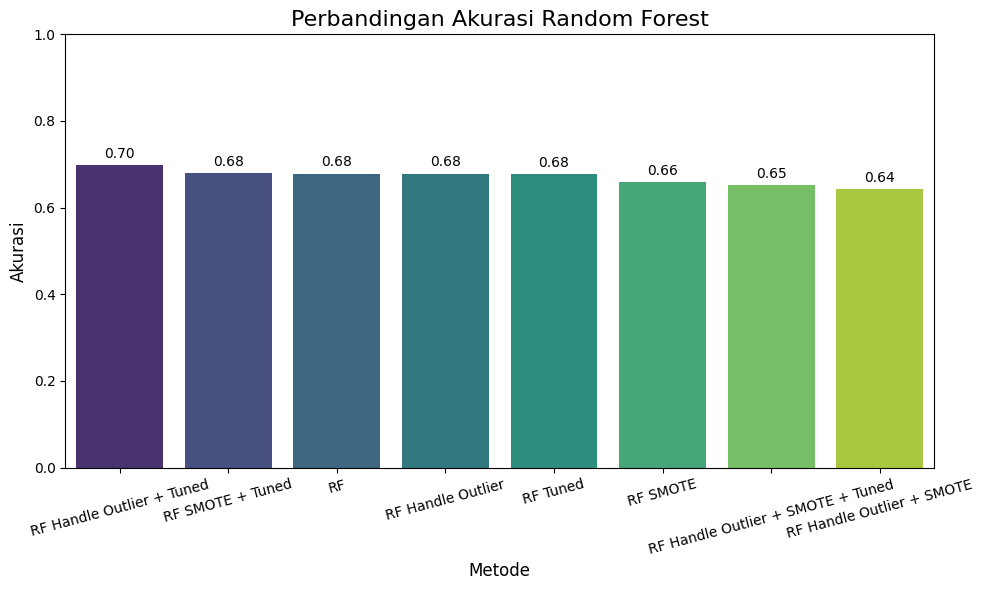

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nilai akurasi masing-masing metode
accuracies = {
    "RF": rf_biasa,
    "RF Handle Outlier": rf_delout,
    "RF SMOTE": rf_smote,
    "RF Handle Outlier + SMOTE": rf_delout_smote,
    "RF Tuned" : rf_tuned,
    "RF Handle Outlier + Tuned" : rf_delout_tuned,
    "RF SMOTE + Tuned" : rf_smote_tuned,
    "RF Handle Outlier + SMOTE + Tuned": rf_delout_smote_tuned
}

# Mengurutkan metode berdasarkan akurasi (terbesar ke terkecil)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Membuat data untuk visualisasi dari hasil pengurutan
methods, scores = zip(*sorted_accuracies)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(methods), y=list(scores), palette="viridis")

# Menambahkan anotasi akurasi pada masing-masing batang
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title("Perbandingan Akurasi Random Forest", fontsize=16)
plt.xlabel("Metode", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)
plt.ylim(0, 1)  # Batas y untuk akurasi (0-1)

# Menampilkan plot
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# **PERBANDINGAN HASIL**

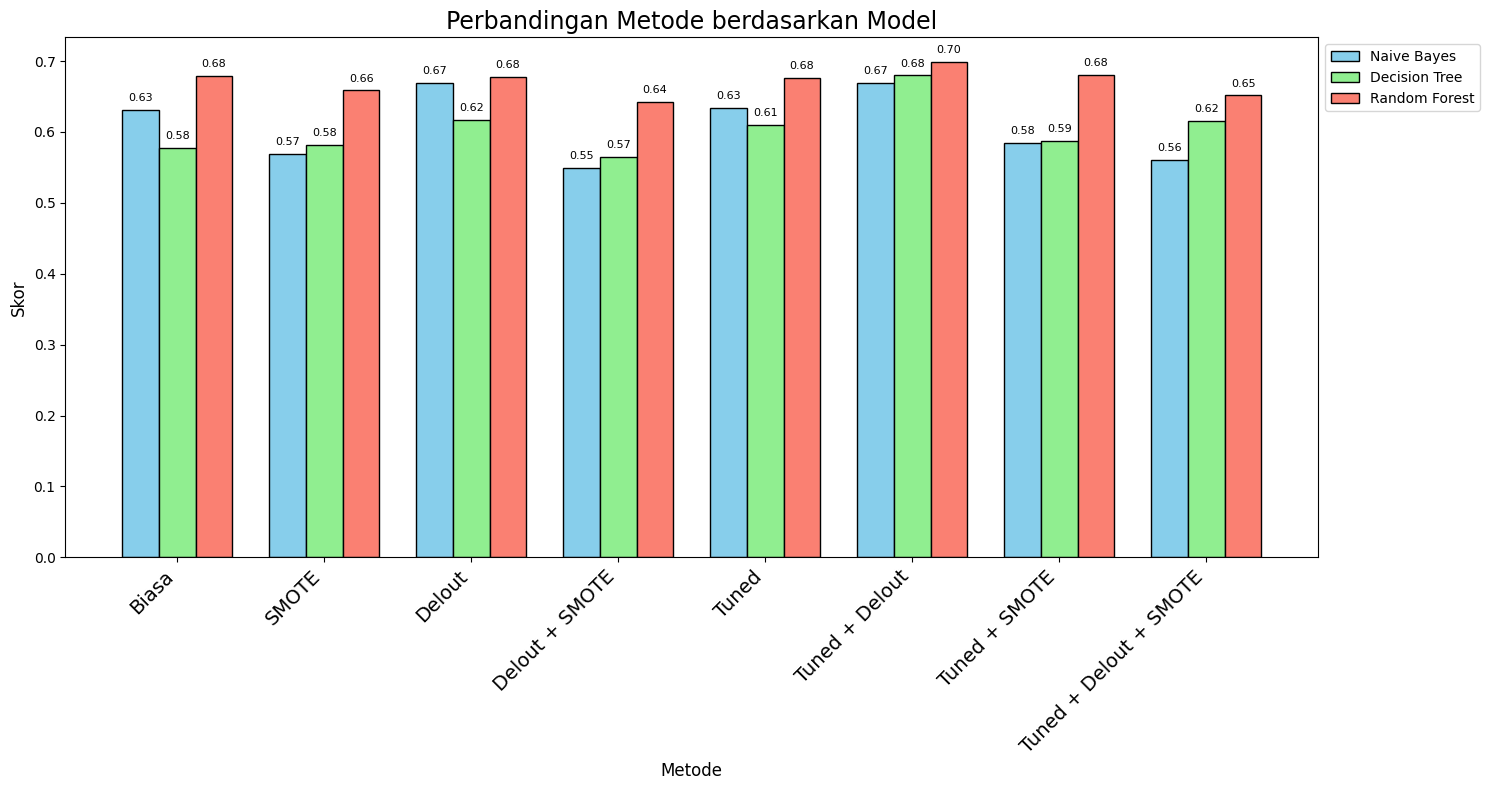

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
nb_values = [nb_mean, nb_mean_smote, nb_mean_delout, nb_mean_smote_delout, nb_tuned, nb_tuned_delout, nb_tuned_smote, nb_tuned_delout_smote]
dt_values = [dt_mean, dt_smote, dt_delout, dt_delout_smote, dt_tuned, dt_delout_tuned, dt_smote_tuned, dt_delout_smote_tuned]
rf_values = [rf_biasa, rf_smote, rf_delout, rf_delout_smote, rf_tuned, rf_delout_tuned, rf_smote_tuned, rf_delout_smote_tuned]
labels = ["Biasa", "SMOTE", "Delout", "Delout + SMOTE", "Tuned", "Tuned + Delout", "Tuned + SMOTE", "Tuned + Delout + SMOTE"]

# Parameter plot
x = np.arange(len(labels))
width = 0.25
font_size = 8

# Membuat plot batang
fig, ax = plt.subplots(figsize=(15, 8))
bars_nb = ax.bar(x - width, nb_values, width, label="Naive Bayes", color="skyblue", edgecolor="black")
bars_dt = ax.bar(x, dt_values, width, label="Decision Tree", color="lightgreen", edgecolor="black")
bars_rf = ax.bar(x + width, rf_values, width, label="Random Forest", color="salmon", edgecolor="black")

# Menambahkan teks pada batang
for bars in [bars_nb, bars_dt, bars_rf]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 5), textcoords="offset points", fontsize=font_size, ha='center', va='bottom')

# Label dan legenda
ax.set_xlabel('Metode', fontsize=12)
ax.set_ylabel('Skor', fontsize=12)
ax.set_title('Perbandingan Metode berdasarkan Model', fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Tata letak dan tampilkan
fig.tight_layout()
plt.show()


## **INTERPRETASI HASIL**

```Model-model klasifikasi yang diuji dalam proyek ini menunjukkan variasi kinerja yang signifikan dalam memprediksi kualitas air. Dari ketiga model, yaitu Naive Bayes, Decision Tree, dan Random Forest, model Random Forest terbukti menjadi yang paling unggul dengan akurasi sebesar 76.60%. Kinerja superior Random Forest, yang merupakan algoritma ensemble learning, juga terlihat dari metrik presisi, recall, dan F1-score yang lebih tinggi untuk kedua kelas ('potable' dan 'non-potable'), menunjukkan kemampuannya dalam menangani kompleksitas data dan interaksi antar fitur dengan lebih baik. Di sisi lain, Decision Tree menempati posisi kedua dengan akurasi 71.41%, sementara Naive Bayes menunjukkan performa terendah dengan akurasi 64.79%, mengindikasikan keterbatasannya dalam mengklasifikasikan data kualitas air yang kompleks ini.```

```Dari perspektif data air itu sendiri, analisis awal mengungkap beberapa karakteristik penting. Dataset awal menunjukkan adanya nilai yang hilang pada parameter vital seperti ph, Sulfate, dan Trihalomethanes. Keputusan untuk mengisi nilai yang hilang ini dengan rata-rata berdasarkan kelompok potabilitas (layak atau tidak layak minum) menyiratkan bahwa nilai-nilai ini mungkin memiliki dampak langsung dan berbeda terhadap kualitas air. Hal ini menunjukkan bahwa ph air, kandungan Sulfate, dan kadar Trihalomethanes kemungkinan besar merupakan indikator krusial dalam menentukan apakah air tersebut aman untuk dikonsumsi.```

```Lebih lanjut, analisis distribusi fitur melalui visualisasi seperti histogram dan box plot mengungkapkan adanya rentang nilai yang luas dan keberadaan outlier pada berbagai parameter air, termasuk Hardness, Solids, Chloramines, dan Organic_carbon. Variabilitas ini mencerminkan kompleksitas alami dari komposisi air di berbagai sumber dan kondisi. Selain itu, dataset ini juga menunjukkan ketidakseimbangan yang jelas pada kelas target 'Potability', di mana sebagian besar sampel air dikategorikan sebagai 'tidak layak minum'. Kondisi ini menyoroti tantangan dalam pengadaan air minum yang aman dan pentingnya penggunaan teknik penyeimbangan kelas seperti SMOTE untuk memastikan model prediksi tidak bias dan dapat mengidentifikasi baik air yang layak maupun tidak layak minum secara efektif.```